# Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.impute import KNNImputer

# Load datas file

In [2]:
%%time
datas = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t',encoding='utf8',low_memory=False)

Wall time: 3min 55s


# Overview of datas

In [3]:
# To optimize display of the Dataframe

#increase max rows displayed to 999
pd.set_option('display.max_rows', 999)

#increase max columns displayed to 999
pd.set_option('display.max_columns', 999)
#increase columns width to 100
pd.set_option('display.max_colwidth', 200)

# Formating float
pd.options.display.float_format = '{:.2f}'.format

In [4]:
datas.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,France,en:france,France,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,nan,NaN,nan,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories...","To be completed,Nutrition facts completed,Ingredients to be

In [5]:
datas.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1752764.00,1752764.00,0.00,0.00,462424.00,0.00,686957.00,686957.00,0.00,686957.00,0.00,652860.00,600831.00,419000.00,127108.00,1338038.00,1391968.00,975.00,1383908.00,1340545.00,13.00,3.00,3.00,9.00,15.00,6.00,19.00,7.00,76.00,28.00,3.00,8.00,15.00,10.00,47397.00,47399.00,1977.00,468.00,117.00,166.00,504.00,234.00,71.00,10.00,5.00,88.00,51.00,2.00,14.00,8.00,5.00,8.00,264546.00,268345.00,1383437.00,1366228.00,138.00,75.00,78.00,767.00,34.00,87.00,497.00,3557.00,466930.00,3607.00,3337.00,1384877.00,43.00,49.00,22.00,1336967.00,1336963.00,19506.00,212136.00,82.00,9523.00,3320.00,1102.00,219765.00,23377.00,22473.00,23566.00,15818.00,10092.00,8447.00,12564.00,1032.00,5986.00,117.00,375.00,91834.00,683.00,269684.00,13660.00,264430.00,14573.00,10093.00,4237.00,4002.00,320.00,2439.00,184.00,273.00,2093.00,421.00,159.00,186.00,8794.00,348.00,11747.00,309.00,5896.00,5.00,455.00,11626.00,652866.00,10.00,4.00,1.00,41.00,1712.00,32.00,46.00,20.00
mean,1551134843.82,1586230460.64,nan,nan,24028060920655772.00,nan,2.05,0.02,nan,0.07,nan,9.18,3.43,48.68,52440120912050307142635595155803996160.00,6564001.58,4788586295725828338220472328439988224.00,362.12,14.60,12.63,59595740958952218624.00,16.13,43.13,9656406605083824245325189983828053276924898124379455488.00,21.53,40.56,134.08,61.47,10.99,1.68,0.00,2.75,36.33,0.28,9.91,5.89,19.17,2.91,1.56,0.88,31.65,4.49,2.40,2.00,20.21,244.88,15.63,0.85,15.33,0.27,0.11,4.70,0.11,0.05,28.88,13.40,12.86,8.20,24.50,3.53,6.42,3.88,177.98,31.13,3.00,2.42,4.27,8.73,50.69,528.18,1.04,2.10,0.84,25633138521480564736.00,0.14,0.55,0.24,0.32,0.21,0.03,0.77,0.07,0.04,0.83,3.15,0.03,0.02,0.33,0.05,1.33,1.67,0.44,0.21,0.18,0.57,0.01,3.41,0.03,0.02,0.01,0.06,0.06,0.54,0.41,1.42,2.39,3.50,6.57,34.20,19.89,46.45,15.15,51.96

In [6]:
#displayed number of Nan in each columns
datas.isna().sum()

code                                                0
url                                                 0
creator                                             4
created_t                                           0
created_datetime                                    0
last_modified_t                                     0
last_modified_datetime                              0
product_name                                    77433
abbreviated_product_name                      1749516
generic_name                                  1639531
quantity                                      1297853
packaging                                     1470828
packaging_tags                                1470854
packaging_text                                1749089
brands                                         841225
brands_tags                                    841281
categories                                     913990
categories_tags                                913991
categories_en               

In [7]:
#displayed number value in each columns
datas.notna().sum()

code                                          1752764
url                                           1752764
creator                                       1752760
created_t                                     1752764
created_datetime                              1752764
last_modified_t                               1752764
last_modified_datetime                        1752764
product_name                                  1675331
abbreviated_product_name                         3248
generic_name                                   113233
quantity                                       454911
packaging                                      281936
packaging_tags                                 281910
packaging_text                                   3675
brands                                         911539
brands_tags                                    911483
categories                                     838774
categories_tags                                838773
categories_en               

In [8]:
datas.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                       int64
created_datetime                               object
last_modified_t                                 int64
last_modified_datetime                         object
product_name                                   object
abbreviated_product_name                       object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
packaging_text                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en               

In [9]:
print('Number of rows : {}' .format(datas.shape[0]))
print('Number of columns : {}' .format(datas.shape[1]))

Number of rows : 1752764
Number of columns : 186


# Data analysis

## Analysis missing data in columns

In [10]:
#create a dataframe to check datas for each columns
datas_columns_analysis=pd.DataFrame(datas.notna().sum(),columns = ['Nb Datas'])
datas_columns_analysis['Nb NaN']=pd.DataFrame(datas.isna().sum())
datas_columns_analysis['Filling rate']=datas_columns_analysis['Nb Datas']/datas_columns_analysis.sum(axis=1)

#reset index of the DataFrame  in place of column name
datas_columns_analysis.reset_index(inplace=True)

#rename column index by the name of the columns
datas_columns_analysis.rename({'index': 'Column name'}, axis=1,inplace=True) 

datas_columns_analysis

,Column name,Nb Datas,Nb NaN,Filling rate
0,code,1752764,0,1.00
1,url,1752764,0,1.00
2,creator,1752760,4,1.00
3,created_t,1752764,0,1.00
4,created_datetime,1752764,0,1.00
5,last_modified_t,1752764,0,1.00
6,last_modified_datetime,1752764,0,1.00
7,product_name,1675331,77433,0.96
8,abbreviated_product_name,3248,1749516,0.00
9,generic_name,113233,1639531,0.06


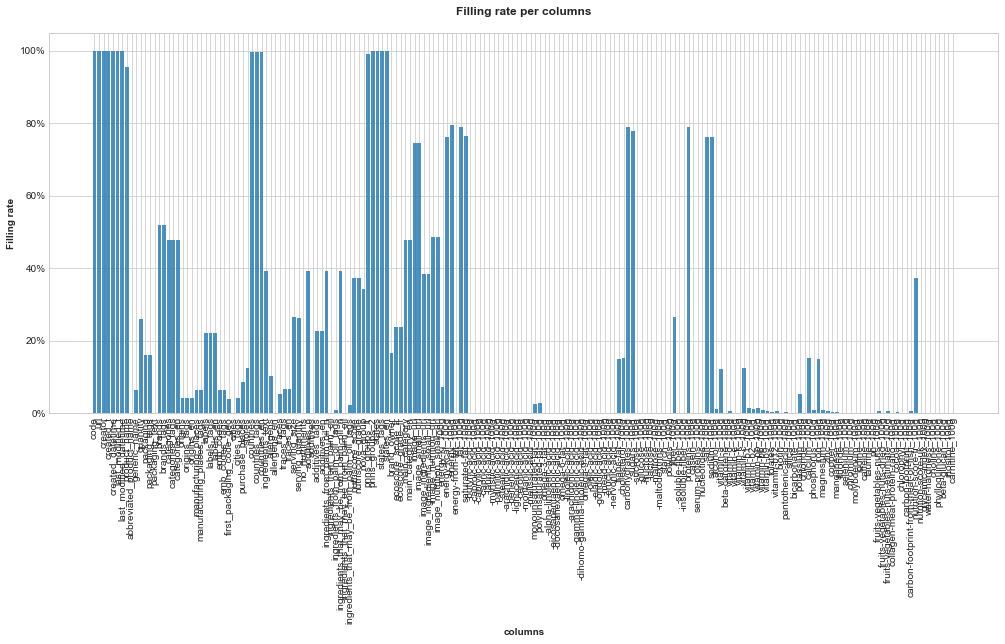

In [11]:
# Graph of the filling rate per columns
plt.style.use('seaborn-whitegrid')

# parameters to have a correct view of the graph
fig = plt.figure(1, figsize=(17, 7))
plt.xticks(rotation=90)

plt.xlabel('columns',fontweight='bold')
plt.ylabel('Filling rate',fontweight='bold')
plt.title("Filling rate per columns\n",fontweight='bold')

plt.bar(datas_columns_analysis['Column name'],datas_columns_analysis['Filling rate'], alpha=0.8)

#display values in % for Y axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#to save graph
#plt.savefig('Filling rate per columns.png')
plt.show()

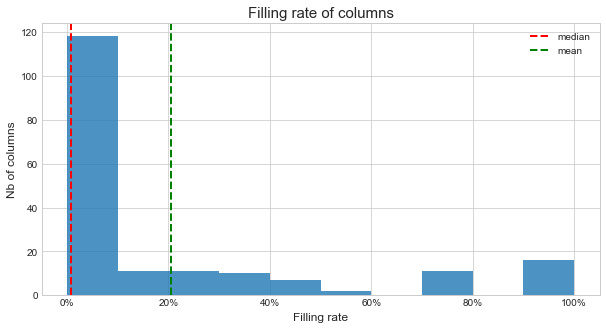

Median: 0.81%
Mean: 20.44%


In [12]:
#Graph of the filling rate of the colmuns
plt.style.use('seaborn-whitegrid')


datas_columns_analysis.hist(column='Filling rate',alpha=0.8,figsize=(10, 5))
plt.axvline(datas_columns_analysis['Filling rate'].median(), color='r', 
            linestyle='dashed', linewidth=2, label='median')

plt.axvline(datas_columns_analysis['Filling rate'].mean(), color='g', 
            linestyle='dashed', linewidth=2, label='mean')

plt.xlabel('Filling rate',fontsize=12)
plt.ylabel('Nb of columns',fontsize=12)
plt.title('Filling rate of columns',fontsize=15)
plt.legend(loc='upper right')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

#to save graph
#plt.savefig('Filling rate of rows after columns filtered')

plt.show()
print('Median: {:2.2%}'.format(datas_columns_analysis['Filling rate'].median()))
print('Mean: {:2.2%}'.format(datas_columns_analysis['Filling rate'].mean()))

**Lot of columns have a low filling rate**

## Analysis missing data in rows

In [13]:
#create a dataframe to check datas for each rows
datas_rows_analysis=pd.DataFrame(datas.notna().sum(axis=1),columns = ['Nb Datas'])
datas_rows_analysis['Nb NaN']=pd.DataFrame(datas.isna().sum(axis=1))
datas_rows_analysis['Filling rate']=datas_rows_analysis['Nb Datas']/datas_rows_analysis.sum(axis=1)

datas_rows_analysis

,Nb Datas,Nb NaN,Filling rate
0,29,157,0.16
1,19,167,0.10
2,20,166,0.11
3,50,136,0.27
4,24,162,0.13
...,...,...,...
1752759,18,168,0.10
1752760,18,168,0.10
1752761,30,156,0.16
1752762,29,157,0.16


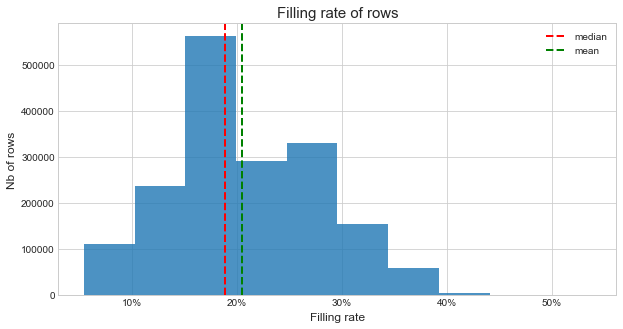

Median: 18.82%
Mean: 20.44%


In [14]:
#Graph of the filling rate of the rows
plt.style.use('seaborn-whitegrid')


datas_rows_analysis.hist(column='Filling rate',alpha=0.8,figsize=(10, 5))
plt.axvline(datas_rows_analysis['Filling rate'].median(), color='r', 
            linestyle='dashed', linewidth=2, label='median')

plt.axvline(datas_rows_analysis['Filling rate'].mean(), color='g', 
            linestyle='dashed', linewidth=2, label='mean')

plt.xlabel('Filling rate',fontsize=12)
plt.ylabel('Nb of rows',fontsize=12)
plt.title('Filling rate of rows',fontsize=15)
plt.legend(loc='upper right')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

#to save graph
#plt.savefig('Filling rate of rows')

plt.show()

print('Median: {:2.2%}'.format(datas_rows_analysis['Filling rate'].median()))
print('Mean: {:2.2%}'.format(datas_rows_analysis['Filling rate'].mean()))

**Lot of rows have a low filling rate due to the low filling rate of columns**

# Cleaning data

## Cleaning columns data

In [15]:
datas_columns_clean = datas_columns_analysis

In [16]:
#create mask o filter columns where filling rate is greater or equal than 35%
mask_columns = datas_columns_analysis['Filling rate']>=0.35
datas_columns_analysis[mask_columns]

,Column name,Nb Datas,Nb NaN,Filling rate
0,code,1752764,0,1.00
1,url,1752764,0,1.00
2,creator,1752760,4,1.00
3,created_t,1752764,0,1.00
4,created_datetime,1752764,0,1.00
5,last_modified_t,1752764,0,1.00
6,last_modified_datetime,1752764,0,1.00
7,product_name,1675331,77433,0.96
14,brands,911539,841225,0.52
15,brands_tags,911483,841281,0.52


In [17]:
#list of columns to keep
columns_to_keep = list(datas_columns_analysis[mask_columns]['Column name'])
print('Number of colmuns to keep : {}' .format(len(columns_to_keep)))


Number of colmuns to keep : 45


In [18]:
#Dataframe with columns to keep
datas_col_filt = datas[columns_to_keep]
datas_col_filt

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Bran...",NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,375.00,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,0.56,nan
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:cate...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,000000000003327986,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:cate...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/pr

We can see after filtering on filling rate greater than 35% :
- we lost nova_group an interesting qualitative value (filling rate : 34%)
- we lost fiber_100g used to calculate nutriscore (filling rate : 27%)
so I reintegrade this columns

In [19]:
datas_col_filt=datas_col_filt.join(datas['nova_group'])
datas_col_filt=datas_col_filt.join(datas['fiber_100g'])
datas_col_filt

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nova_group,fiber_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Bran...",NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,375.00,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,0.56,nan,nan,nan
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:cate...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,000000000003327986,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,nan,nan,nan,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:cate...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be complete...",NaN,NaN,http

There's 2 columns about nutriscore check if values are same and the columns with the most values :

In [20]:
col_nutriscore = (datas_col_filt['nutriscore_score'] != datas_col_filt['nutrition-score-fr_100g']) &  (datas_col_filt['nutriscore_score'].notna() | datas_col_filt['nutrition-score-fr_100g'].notna())

datas_col_filt[col_nutriscore][['nutriscore_score','nutrition-score-fr_100g']]

,nutriscore_score,nutrition-score-fr_100g
511123,nan,13.00
592203,nan,22.00
606304,nan,22.00
815980,nan,18.00
1164449,nan,10.00
1731871,nan,22.00


Values are the same in both columns and there's more values in column nutrition-score-fr_100g so I'll drop column nutriscore_score

In [21]:
datas_col_filt.drop('nutriscore_score', axis=1, inplace=True, errors='ignore')

Check columns salt_100g and sodium_100g, values in salt_100g need to be greater than values in sodium_100g

In [22]:
check_salt_sodium = ~(datas_col_filt['salt_100g'] < datas_col_filt['sodium_100g']) 

datas_col_filt=datas_col_filt[check_salt_sodium]

In [23]:
check_salt_sodium = (datas_col_filt['salt_100g'].isna() & datas_col_filt['sodium_100g'].notna())  | (datas_col_filt['salt_100g'].notna() & datas_col_filt['sodium_100g'].isna()) 
datas_col_filt[check_salt_sodium][['salt_100g','sodium_100g']]

,salt_100g,sodium_100g
379090,14.14,nan
408972,0.18,nan
984091,0.00,nan
1270420,0.30,nan


Values are the same in both columns and there's more values in column salt_100g so I'll drop column sodium_100g

In [24]:
datas_col_filt.drop('sodium_100g', axis=1, inplace=True, errors='ignore')

C:\Users\Hugues\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
datas_col_filt.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nova_group', 'fiber_100g'],
      dtype='object')

In [26]:
#drop columns less useful for analysis
datas_col_filt.drop(['creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime','brands_tags',
    'categories', 'categories_tags','countries', 'countries_tags',
                     'ingredients_text', 
                   'states', 'states_tags', 'states_en',
                   'main_category','image_small_url','image_ingredients_url',
                     'image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url']
                    ,axis=1,inplace=True)

C:\Users\Hugues\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#check after column filtered
print('Number of rows : {}' .format(datas_col_filt.shape[0]))
print('Number of columns : {}' .format(datas_col_filt.shape[1]))

Number of rows : 1752742
Number of columns : 25


## Cleaning rows data

use dataframe (datas_col_filt) filtered on columns with filling rate greater than 35%

In [28]:
#create a dataframe to check datas for each rows
datas_rows=pd.DataFrame(datas_col_filt.notna().sum(axis=1),columns = ['Nb Datas'])
datas_rows['Nb NaN']=pd.DataFrame(datas_col_filt.isna().sum(axis=1))
datas_rows['Filling rate']=datas_rows['Nb Datas']/datas_rows.sum(axis=1)

datas_rows

,Nb Datas,Nb NaN,Filling rate
0,15,10,0.60
1,7,18,0.28
2,7,18,0.28
3,23,2,0.92
4,9,16,0.36
...,...,...,...
1752759,7,18,0.28
1752760,7,18,0.28
1752761,15,10,0.60
1752762,15,10,0.60


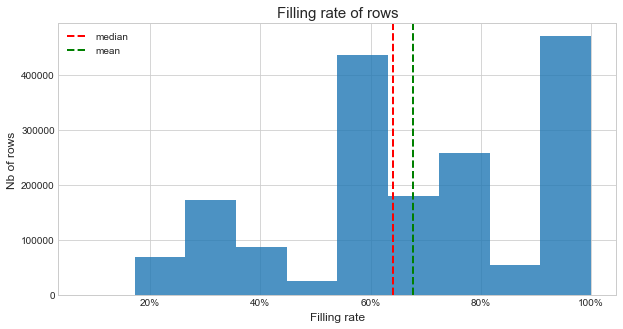

Median: 64.00%
Mean: 67.72%


In [29]:
#Graph of the filling rate of the rows for columns filtered
plt.style.use('seaborn-whitegrid')


datas_rows.hist(column='Filling rate',alpha=0.8,figsize=(10, 5))
plt.axvline(datas_rows['Filling rate'].median(), color='r', 
            linestyle='dashed', linewidth=2, label='median')

plt.axvline(datas_rows['Filling rate'].mean(), color='g', 
            linestyle='dashed', linewidth=2, label='mean')

plt.xlabel('Filling rate',fontsize=12)
plt.ylabel('Nb of rows',fontsize=12)
plt.title('Filling rate of rows',fontsize=15)
plt.legend(loc='upper left')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

#to save graph
#plt.savefig('Filling rate of rows after columns filtered')

plt.show()

print('Median: {:2.2%}'.format(datas_rows['Filling rate'].median()))
print('Mean: {:2.2%}'.format(datas_rows['Filling rate'].mean()))

Filling rate is better after filtering columns

**Filling rate is better per rows after filtering the columns**

In [30]:
#create mask to filter rows where filling rate is greater or equal than 40%
mask_rows = datas_rows['Filling rate']>=0.4
datas_row_col_filt = datas_rows[mask_rows]
datas_row_col_filt

,Nb Datas,Nb NaN,Filling rate
0,15,10,0.60
3,23,2,0.92
5,15,10,0.60
6,15,10,0.60
12,15,10,0.60
...,...,...,...
1752755,23,2,0.92
1752756,19,6,0.76
1752758,15,10,0.60
1752761,15,10,0.60


In [31]:
#list of rows to keep
rows_to_keep = list(datas_rows[mask_rows].index)

#Create a DataFrame with rows and columns filtered
datas_row_col_filt=datas_col_filt[datas_col_filt.index.isin(rows_to_keep)]
datas_row_col_filt

,code,url,product_name,brands,categories_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,image_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nova_group,fiber_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,Vitória crackers,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,375.00,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,nan,nan,nan
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,courte paille,"Groceries,Condiments,Sauces,Mustards",France,0.00,0.00,0.00,d,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,nan,936.00,8.20,2.20,29.00,22.00,5.10,4.60,18.00,nan,0.00
5,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,Sauce Sweety chili 0%,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,21.00,88.00,0.00,0.00,4.80,0.40,0.20,2.04,nan,nan,nan
6,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,Mini coco,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,60.00,251.00,3.00,1.00,10.00,3.00,2.00,1.15,nan,nan,nan
12,000000000080,http://world-en.openfoodfacts.org/product/000000000080/pur-jus-de-pomme,Pur jus de pomme,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/080/front_fr.3.400.jpg,63.00,264.00,0.00,0.00,15.50,15.50,0.20,0.00,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752755,9999999175305,http://world-en.openfoodfacts.org/product/9999999175305/erdbeerkuchen-1019g-tiefgefroren-coppenrath-wiese,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,"Biscuits and cakes,Cakes,de:tiefkühl-kuchen",Germany,2.00,0.00,0.00,d,Sugary snacks,Biscuits and cakes,de:tiefkühl-kuchen,https://static.openfoodfacts.org/images/products/999/999/917/5305/front_de.8.400.jpg,nan,925.00,7.60,4.80,35.00,24.00,2.60,0.28,12.00,4.00,nan
1752756,99999995,http://world-en.openfoodfacts.org/product/99999995/steak-hache-pur-boeuf,Steak haché pur boeuf,NaN,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Ground beef steaks",France,nan,nan,nan,a,Fish Meat Eggs,Meat,Ground beef steaks,https://static.openfoodfacts.org/images/products/99999995/front_fr.11.400.jpg,131.00,548.00,5.00,2.30,0.00,0.00,21.50,0.18,-2.00,nan,nan
1752758,9999999901,http://world-en.openfoodfacts.org/product/9999999901/scs,Scs,NaN,NaN,United Kingdom,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/999/999/990/1/front_en.3.400.jpg,100.00,418.00,12.00,1.00,2.00,1.00,1.00,1.00,nan,nan,nan
1752761,9999999990397,http://world-en.openfoodfacts.org/product/9999999990397/fati,Fati,NaN,NaN,Belgium,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/999/999/999/0397/front_fr.3.400.jpg,24.00,100.00,0.30,0.00,2.40,0.60,1.60,0.64,nan,nan,nan


In [32]:
#Remove rows without product_name and brands
datas_row_col_filt=datas_row_col_filt[~(datas_row_col_filt['product_name'].isna()&datas_row_col_filt['brands'].isna())]

In [33]:
#check after column and rows filtered
print('Number of rows : {}' .format(datas_row_col_filt.shape[0]))
print('Number of columns : {}' .format(datas_row_col_filt.shape[1]))


Number of rows : 1469125
Number of columns : 25


## Filter outliers

Filter the product with a fied where the value is greater than the maximum possible or lower than minimum:
- for ingredients_100g, the value can't be greater than 100 and lower than 0
- for energy max if for lipid and it's 3700KJ for 100g and lower than 0KJ
- Energy in KJ need to be greater than energy in Kcal
- for nutriscore values are between -15 to 40
- for nova values are between 1 to 4
- Sum of ingredients equal 0 or Nan
- energy in Kcal is greater than energy in KJ

In [34]:
datas_outlier_filt = datas_row_col_filt.copy()

datas_outlier_filt['ingredients_sum']=0 #used to check if the sum of the ingredients are >0 and not NaN

for col in datas_outlier_filt.select_dtypes('float'):
    if 'energy' in col.lower():
        datas_outlier_filt=datas_outlier_filt[((datas_outlier_filt[col]>=0) & (datas_outlier_filt[col]<=3700)) | (datas_outlier_filt[col].isna())]
                  
    elif 'score' in col.lower():
        datas_outlier_filt=datas_outlier_filt[(datas_outlier_filt[col]>=-15) & (datas_outlier_filt[col]<=40) | (datas_outlier_filt[col].isna())]
    
    elif 'nova' in col.lower():
        datas_outlier_filt=datas_outlier_filt[(datas_outlier_filt[col]>=1) & (datas_outlier_filt[col]<=4) | (datas_outlier_filt[col].isna())]    
    
    elif '_100g' in col.lower():
        datas_outlier_filt=datas_outlier_filt[(datas_outlier_filt[col]>=0) & (datas_outlier_filt[col]<=100) | (datas_outlier_filt[col].isna())]
        datas_outlier_filt['ingredients_sum']=datas_outlier_filt[['ingredients_sum',col]].sum(axis=1)

        
#filter rows if sum of the ingredients are NaN or equal 0
datas_outlier_filt=datas_outlier_filt[datas_outlier_filt['ingredients_sum']>0]

# #filter rows where energy in Kcal is greater than energy in KJ
datas_outlier_filt=datas_outlier_filt[~(datas_outlier_filt['energy_100g']<=datas_outlier_filt['energy-kcal_100g'])]

#Dataframe without outliers
datas_outlier_filt.drop(['ingredients_sum'], axis=1,inplace=True)
datas_outlier_filt

,code,url,product_name,brands,categories_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,image_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nova_group,fiber_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,Vitória crackers,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,375.00,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,nan,nan,nan
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,courte paille,"Groceries,Condiments,Sauces,Mustards",France,0.00,0.00,0.00,d,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,nan,936.00,8.20,2.20,29.00,22.00,5.10,4.60,18.00,nan,0.00
5,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,Sauce Sweety chili 0%,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,21.00,88.00,0.00,0.00,4.80,0.40,0.20,2.04,nan,nan,nan
6,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,Mini coco,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,60.00,251.00,3.00,1.00,10.00,3.00,2.00,1.15,nan,nan,nan
12,000000000080,http://world-en.openfoodfacts.org/product/000000000080/pur-jus-de-pomme,Pur jus de pomme,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/080/front_fr.3.400.jpg,63.00,264.00,0.00,0.00,15.50,15.50,0.20,0.00,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752753,9999999004360,http://world-en.openfoodfacts.org/product/9999999004360/minis-beignets,Minis beignets,NaN,"Snacks,Sweet snacks,Sweet Fritters",France,nan,nan,nan,d,unknown,unknown,Sweet Fritters,https://static.openfoodfacts.org/images/products/999/999/900/4360/front_fr.4.400.jpg,333.00,1393.00,20.20,6.00,30.90,10.40,7.40,1.10,15.00,nan,nan
1752755,9999999175305,http://world-en.openfoodfacts.org/product/9999999175305/erdbeerkuchen-1019g-tiefgefroren-coppenrath-wiese,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,"Biscuits and cakes,Cakes,de:tiefkühl-kuchen",Germany,2.00,0.00,0.00,d,Sugary snacks,Biscuits and cakes,de:tiefkühl-kuchen,https://static.openfoodfacts.org/images/products/999/999/917/5305/front_de.8.400.jpg,nan,925.00,7.60,4.80,35.00,24.00,2.60,0.28,12.00,4.00,nan
1752756,99999995,http://world-en.openfoodfacts.org/product/99999995/steak-hache-pur-boeuf,Steak haché pur boeuf,NaN,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Ground beef steaks",France,nan,nan,nan,a,Fish Meat Eggs,Meat,Ground beef steaks,https://static.openfoodfacts.org/images/products/99999995/front_fr.11.400.jpg,131.00,548.00,5.00,2.30,0.00,0.00,21.50,0.18,-2.00,nan,nan
1752758,9999999901,http://world-en.openfoodfacts.org/product/9999999901/scs,Scs,NaN,NaN,United Kingdom,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/999/999/990/1/front_en.3.400.jpg,100.00,418.00,12.00,1.00,2.00,1.00,1.00,1.00,nan,nan,nan


In [35]:
#There's 2 columns about energy, drop columns 'energy-kcal_100g'
datas_outlier_filt.drop(['energy-kcal_100g'], axis=1,inplace=True)

In [36]:
#check after column and rows filtered
print('Number of rows : {}' .format(datas_outlier_filt.shape[0]))
print('Number of columns : {}' .format(datas_outlier_filt.shape[1]))

Number of rows : 1336639
Number of columns : 24


## Filter duplicate

In [37]:
#to check product and brand convert in upper case and without accents

datas_duplic_filt = datas_outlier_filt.copy()
datas_duplic_filt['product_name_upper'] = datas_duplic_filt['product_name'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
datas_duplic_filt['brands_upper'] = datas_duplic_filt['brands'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [38]:
# drop the duplicate product/brand
datas_duplic_filt.drop_duplicates(subset=['product_name_upper','brands_upper'],inplace=True)

#drop added columns in upper case and without accents
datas_duplic_filt.drop(['product_name_upper','brands_upper'], axis=1,inplace=True)
datas_duplic_filt.sort_values(by=['product_name','brands'])

,code,url,product_name,brands,categories_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,image_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nova_group,fiber_100g
1404439,8000300137965,http://world-en.openfoodfacts.org/product/8000300137965/18-marrons-glaces-motta,18 marrons glacés,Motta,"Plant-based foods and beverages,Plant-based foods,Snacks,Sweet snacks,Confectioneries,Nuts and their products,Nut confectioneries,Marrons glacés",France,1.00,0.00,0.00,c,Sugary snacks,Sweets,Marrons glacés,https://static.openfoodfacts.org/images/products/800/030/013/7965/front_fr.10.400.jpg,1378.00,0.80,0.10,76.00,56.00,0.80,0.05,9.00,4.00,4.80
1737152,9300633749033,http://world-en.openfoodfacts.org/product/9300633749033/beef-madras-woolworths,Beef Madras,Woolworths,"Frozen foods,Indian-meals,Readymeals",Australia,3.00,0.00,0.00,b,unknown,unknown,Readymeals,https://static.openfoodfacts.org/images/products/930/063/374/9033/front_en.9.400.jpg,601.00,7.80,4.50,5.40,4.00,12.40,0.84,1.00,4.00,1.20
712214,3256221407167,http://world-en.openfoodfacts.org/product/3256221407167/biscuit-tablette-chocolat-au-lait-bio-u-bio,Biscuit Tablette Chocolat au Lait bio,"U Bio,U","Snacks,Sweet snacks,Biscuits and cakes,Biscuits,Chocolate biscuits,Milk chocolate biscuits",France,3.00,0.00,0.00,e,Sugary snacks,Biscuits and cakes,Milk chocolate biscuits,https://static.openfoodfacts.org/images/products/325/622/140/7167/front_fr.11.400.jpg,2198.00,27.20,13.30,62.00,35.20,7.00,0.53,23.00,4.00,2.30
1351195,7610845355666,http://world-en.openfoodfacts.org/product/7610845355666/boletus-coop,Boletus,Coop,"Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Vegetables based foods,Dried products,Mushrooms and their products,Dried plant-based foods,Dried mushrooms,Dried...","France,Switzerland",0.00,0.00,0.00,a,fruits-and-vegetables,vegetables,Dried porcini mushrooms,https://static.openfoodfacts.org/images/products/761/084/535/5666/front_fr.13.400.jpg,1280.00,3.00,1.00,30.00,17.00,31.00,0.08,-9.00,1.00,19.00
695623,3248833088674,http://world-en.openfoodfacts.org/product/3248833088674/boulettes-a-la-marocaine-et-legumes-marie,Boulettes à la Marocaine et légumes,MARIE,"Frozen foods,Meals,Frozen ready-made meals",France,0.00,0.00,0.00,a,Composite foods,One-dish meals,Frozen ready-made meals,NaN,393.00,3.90,1.10,9.30,2.00,5.10,0.40,-1.00,3.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715420,8851959158173,http://world-en.openfoodfacts.org/product/8851959158173/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%95%E0%B9%89%E0%B8%B2,NaN,"แฟนต้า,Fanta","Beverages,Carbonated drinks",Thailand,nan,nan,nan,NaN,unknown,unknown,Carbonated drinks,https://static.openfoodfacts.org/images/products/885/195/915/8173/front_en.4.400.jpg,168.00,nan,nan,9.50,9.50,nan,0.02,nan,nan,nan
1712435,8850092810245,http://world-en.openfoodfacts.org/product/8850092810245/%E0%B9%84%E0%B8%AD%E0%B8%A7%E0%B8%B5%E0%B9%88,NaN,"ไอวี่,ivy","Beverages,Non-Alcoholic beverages,Herbal tea beverages,Sweetened beverages",Thailand,nan,nan,nan,d,Beverages,Sweetened beverages,Sweetened beverages,https://static.openfoodfacts.org/images/products/885/009/281/0245/front_en.9.400.jpg,117.00,0.00,0.00,7.20,6.40,0.00,0.00,9.00,nan,0.00
1155801,4970020026648,http://world-en.openfoodfacts.org/product/4970020026648/%E3%82%AA%E3%83%8F%E3%83%A8%E3%83%BC,NaN,"オハヨー,Ohayo","Desserts,Frozen foods,Frozen desserts,Ice creams and sorbets,Ice creams,Ice cream bars",Japan,nan,nan,nan,NaN,Milk and dairy products,Ice cream,Ice cream bars,https://static.openfoodfacts.org/images/products/497/002/002/6648/front_ja.7.400.jpg,619.00,5.60,nan,22.80,nan,1.60,0.06,nan,nan,nan
1154251,4902201163378,http://world-en.openfoodfacts.org/product/4902201163378/%E3%83%8D%E3%82%B9%E3%83%AC,NaN,"ネスレ,Nestlé","

In [39]:
# drop the duplicate code
datas_duplic_filt.drop_duplicates(subset=['code'],inplace=True)

In [40]:
#check after duplicate filtered
print('Number of rows : {}' .format(datas_duplic_filt.shape[0]))
print('Number of columns : {}' .format(datas_duplic_filt.shape[1]))

Number of rows : 1032991
Number of columns : 24


## Impute missing values

In [41]:
#check missing values per columns
for col in datas_duplic_filt.columns:
    print(f'{col :-<50},{datas_duplic_filt[col].isna().sum()}')

code----------------------------------------------,0
url-----------------------------------------------,0
product_name--------------------------------------,2784
brands--------------------------------------------,378082
categories_en-------------------------------------,458622
countries_en--------------------------------------,1705
additives_n---------------------------------------,514055
ingredients_from_palm_oil_n-----------------------,514055
ingredients_that_may_be_from_palm_oil_n-----------,514055
nutriscore_grade----------------------------------,520574
pnns_groups_1-------------------------------------,2009
pnns_groups_2-------------------------------------,0
main_category_en----------------------------------,458622
image_url-----------------------------------------,279534
energy_100g---------------------------------------,4146
fat_100g------------------------------------------,5084
saturated-fat_100g--------------------------------,35584
carbohydrates_100g----------------------

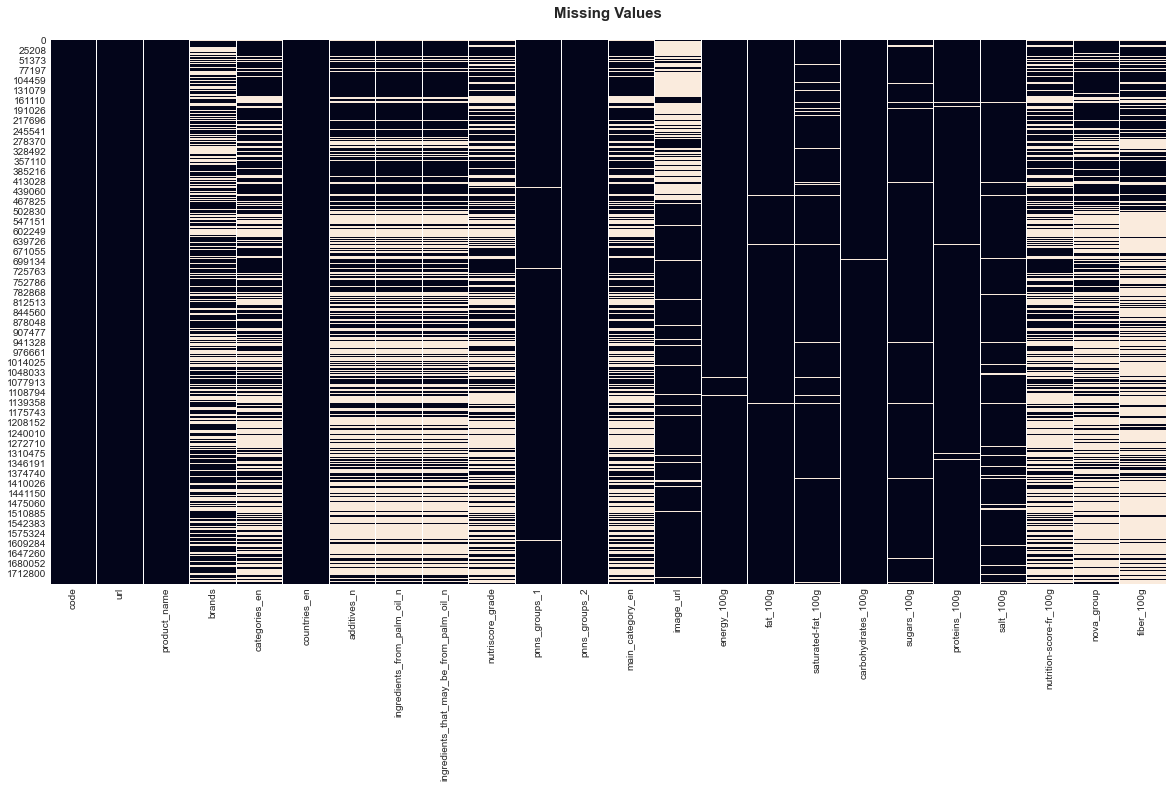

In [42]:
#heatmap to display missing values
plt.figure(figsize=(20,10))
plt.title('Missing Values\n', fontsize=15,fontweight='bold')
sns.heatmap(datas_duplic_filt.isna(), cbar=False)
plt.show()

In [43]:
#for imputation we just need to consider numeric values check missing values
for col in datas_duplic_filt.select_dtypes('float'):
    print(f'{col :-<50},{datas_duplic_filt[col].isna().sum()}')

additives_n---------------------------------------,514055
ingredients_from_palm_oil_n-----------------------,514055
ingredients_that_may_be_from_palm_oil_n-----------,514055
energy_100g---------------------------------------,4146
fat_100g------------------------------------------,5084
saturated-fat_100g--------------------------------,35584
carbohydrates_100g--------------------------------,5319
sugars_100g---------------------------------------,16788
proteins_100g-------------------------------------,4036
salt_100g-----------------------------------------,47668
nutrition-score-fr_100g---------------------------,520568
nova_group----------------------------------------,572475
fiber_100g----------------------------------------,643595


In [44]:
# filter on columns with float
datas_to_impute=datas_duplic_filt.select_dtypes('float')

#Columns with qualitatives information : 'additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'nova_group'
datas_to_impute=datas_to_impute.drop(['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','nova_group'],axis=1)

datas_to_impute

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,nan,nan
3,936.00,8.20,2.20,29.00,22.00,5.10,4.60,18.00,0.00
5,88.00,0.00,0.00,4.80,0.40,0.20,2.04,nan,nan
6,251.00,3.00,1.00,10.00,3.00,2.00,1.15,nan,nan
12,264.00,0.00,0.00,15.50,15.50,0.20,0.00,nan,nan
...,...,...,...,...,...,...,...,...,...
1752751,1556.00,11.00,1.30,58.00,54.00,6.30,0.02,nan,nan
1752753,1393.00,20.20,6.00,30.90,10.40,7.40,1.10,15.00,nan
1752755,925.00,7.60,4.80,35.00,24.00,2.60,0.28,12.00,nan
1752758,418.00,12.00,1.00,2.00,1.00,1.00,1.00,nan,nan


Use KNNImputer to impute missing values

In [45]:
%%time
imputer = KNNImputer()
datas_imputed = pd.DataFrame(imputer.fit_transform(datas_to_impute),columns = datas_to_impute.columns)

Wall time: 12h 12min 54s


In [46]:
datas_imputed

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,4.80,12.82
1,936.00,8.20,2.20,29.00,22.00,5.10,4.60,18.00,0.00
2,88.00,0.00,0.00,4.80,0.40,0.20,2.04,6.60,1.30
3,251.00,3.00,1.00,10.00,3.00,2.00,1.15,2.80,9.46
4,264.00,0.00,0.00,15.50,15.50,0.20,0.00,3.60,1.01
...,...,...,...,...,...,...,...,...,...
1032986,1556.00,11.00,1.30,58.00,54.00,6.30,0.02,0.00,3.57
1032987,1393.00,20.20,6.00,30.90,10.40,7.40,1.10,15.00,1.42
1032988,925.00,7.60,4.80,35.00,24.00,2.60,0.28,12.00,0.54
1032989,418.00,12.00,1.00,2.00,1.00,1.00,1.00,3.00,2.06


In [47]:
#Check all missing values were imputed
for col in datas_imputed.select_dtypes('float'):
    print(f'{col :-<50},{datas_imputed[col].isna().sum()}')

energy_100g---------------------------------------,0
fat_100g------------------------------------------,0
saturated-fat_100g--------------------------------,0
carbohydrates_100g--------------------------------,0
sugars_100g---------------------------------------,0
proteins_100g-------------------------------------,0
salt_100g-----------------------------------------,0
nutrition-score-fr_100g---------------------------,0
fiber_100g----------------------------------------,0


Merge imputed data with other data

In [48]:
datas_temp = datas_duplic_filt.drop(datas_imputed.columns,axis=1)
imputed_merged=datas_temp.reset_index(drop=True).join(datas_imputed)
imputed_merged

,code,url,product_name,brands,categories_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,image_url,nova_group,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,Vitória crackers,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,nan,1569.00,7.00,3.08,70.10,15.00,7.80,1.40,4.80,12.82
1,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,courte paille,"Groceries,Condiments,Sauces,Mustards",France,0.00,0.00,0.00,d,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,nan,936.00,8.20,2.20,29.00,22.00,5.10,4.60,18.00,0.00
2,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,Sauce Sweety chili 0%,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,nan,88.00,0.00,0.00,4.80,0.40,0.20,2.04,6.60,1.30
3,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,Mini coco,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,nan,251.00,3.00,1.00,10.00,3.00,2.00,1.15,2.80,9.46
4,000000000080,http://world-en.openfoodfacts.org/product/000000000080/pur-jus-de-pomme,Pur jus de pomme,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/080/front_fr.3.400.jpg,nan,264.00,0.00,0.00,15.50,15.50,0.20,0.00,3.60,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032986,99999988,http://world-en.openfoodfacts.org/product/99999988/boules,Boules,NaN,NaN,France,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/99999988/front_en.7.400.jpg,nan,1556.00,11.00,1.30,58.00,54.00,6.30,0.02,0.00,3.57
1032987,9999999004360,http://world-en.openfoodfacts.org/product/9999999004360/minis-beignets,Minis beignets,NaN,"Snacks,Sweet snacks,Sweet Fritters",France,nan,nan,nan,d,unknown,unknown,Sweet Fritters,https://static.openfoodfacts.org/images/products/999/999/900/4360/front_fr.4.400.jpg,nan,1393.00,20.20,6.00,30.90,10.40,7.40,1.10,15.00,1.42
1032988,9999999175305,http://world-en.openfoodfacts.org/product/9999999175305/erdbeerkuchen-1019g-tiefgefroren-coppenrath-wiese,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,"Biscuits and cakes,Cakes,de:tiefkühl-kuchen",Germany,2.00,0.00,0.00,d,Sugary snacks,Biscuits and cakes,de:tiefkühl-kuchen,https://static.openfoodfacts.org/images/products/999/999/917/5305/front_de.8.400.jpg,4.00,925.00,7.60,4.80,35.00,24.00,2.60,0.28,12.00,0.54
1032989,9999999901,http://world-en.openfoodfacts.org/product/9999999901/scs,Scs,NaN,NaN,United Kingdom,nan,nan,nan,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/999/999/990/1/front_en.3.400.jpg,nan,418.00,12.00,1.00,2.00,1.00,1.00,1.00,3.00,2.06


In [49]:
#save datas imputed to csv
imputed_merged.to_csv('datas_cleaned.csv', index = False)